**Predict Bank Marketing Campaign Success Using Binary Classification**  <br>
Objective: Predict whether a customer will subscribe to a term deposit, applying feature
selection and classification models

# **Environment Setup and Data Exploration**

## Importing Essential libraries

In [97]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Importing tools for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split                                    # To split data into training and testing sets

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score     # For model evaluation metrics
from sklearn.model_selection import cross_val_score                                     # For performing cross-validation

# Standardization for consistent model performance
from sklearn.preprocessing import StandardScaler                                        # To scale features for uniformity

# Importing classification models

from sklearn.linear_model import LogisticRegression                                     # Logistic Regression for binary classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier                                         # Decision Tree for rule-based classification
 



## Loading dataset

In [98]:
# loading dataset
bank_dataset=pd.read_csv("bank.csv")



## Exploring Dataset

In [99]:
# Displaying the first 5 rows of the dataset to understand its structure and content
print("Dataset Head")
bank_dataset.head()

Dataset Head


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [100]:
# Displaying the first 5 rows of the dataset
print("Dataset Tail")
bank_dataset.tail()

Dataset Tail


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [101]:
# Displaying the shape of the dataset,number of rows and columns
print("Dataset Shape:")
bank_dataset.shape

Dataset Shape:


(11162, 17)

In [102]:
# Displaying names of coloumns in dataset
print("Columns in dataset")
bank_dataset.columns

Columns in dataset


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [103]:
# Displaying dataset information, including column data types and non-null values
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Statistical Overview of Data

In [104]:
# Displaying summary statistics of the dataset to get an overview of numerical columns
bank_dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# **Data Preprocessing**

### Checking for missing values


In [105]:
# Checking for missing values in each column of the dataset
print("Checking for missing values per column")
bank_dataset.isnull().sum()

Checking for missing values per column


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Encoding Categorical Columns

In [106]:
# This converts string labels into numeric values to be used in machine learning models.
categorical_cols=bank_dataset.select_dtypes(include=['object']).columns
encoder=LabelEncoder()
for cols in categorical_cols:
    bank_dataset[cols]=encoder.fit_transform(bank_dataset[cols])
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


# **Feature Selection**

In [107]:
X=bank_dataset.drop(columns='deposit')
Y=bank_dataset['deposit']

### Correlation analysis

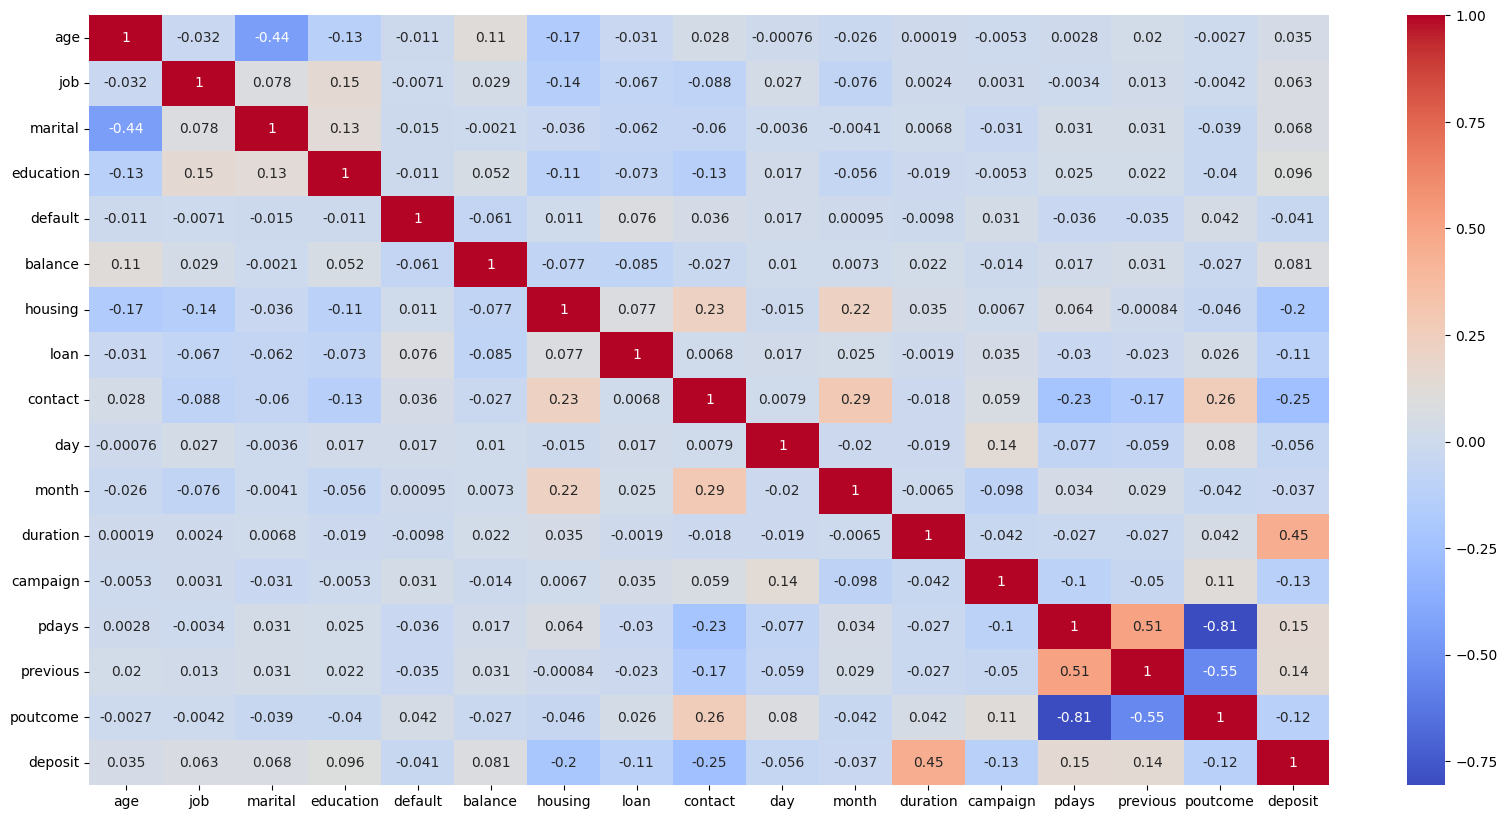

In [108]:
# Performing correlation analysis to identify highly correlated features with the target variable 'y'

correlation=bank_dataset.corr()
# Plotting correlation values of features with the target variable
plt.figure(figsize=(20, 10))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

In [109]:
# Correlation with the target variable
target_corr = correlation['deposit'].sort_values(ascending=False)  # Replace with the target column name
print("Correlation with Target Variable:\n", target_corr)

# Filter significant correlations (e.g., absolute value > 0.1)
strong_corr_features= target_corr[abs(target_corr) > 0.1].index.tolist()
print("\nSignificant Features based on Correlation:\n", strong_corr_features)


Correlation with Target Variable:
 deposit      1.000000
duration     0.451919
pdays        0.151593
previous     0.139867
education    0.095948
balance      0.081129
marital      0.067610
job          0.063395
age          0.034901
month       -0.037121
default     -0.040680
day         -0.056326
loan        -0.110580
poutcome    -0.122369
campaign    -0.128081
housing     -0.203888
contact     -0.249847
Name: deposit, dtype: float64

Significant Features based on Correlation:
 ['deposit', 'duration', 'pdays', 'previous', 'loan', 'poutcome', 'campaign', 'housing', 'contact']


### Mutual Information Score

In [110]:
# Compute mutual information
mi_scores = mutual_info_classif(X, Y, random_state=42)

# Create a DataFrame for better visualization
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)

# Display mutual information scores
print(mi_scores_df)

# Select top features based on threshold or top-K approach
selected_features_mi = mi_scores_df['Feature'][:10]  # Select top 8 features
print("\nSelected Features based on Mutual Information:\n", selected_features_mi.tolist())

      Feature  Mutual Information
11   duration            0.164447
5     balance            0.046418
15   poutcome            0.045235
13      pdays            0.044139
10      month            0.041927
14   previous            0.030738
8     contact            0.026462
0         age            0.020027
6     housing            0.017530
3   education            0.012399
12   campaign            0.012238
1         job            0.009964
9         day            0.006124
4     default            0.003199
2     marital            0.002561
7        loan            0.000016

Selected Features based on Mutual Information:
 ['duration', 'balance', 'poutcome', 'pdays', 'month', 'previous', 'contact', 'age', 'housing', 'education']


C:\Users\dell\AppData\Local\Temp\ipykernel_1436\2128984199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='viridis')


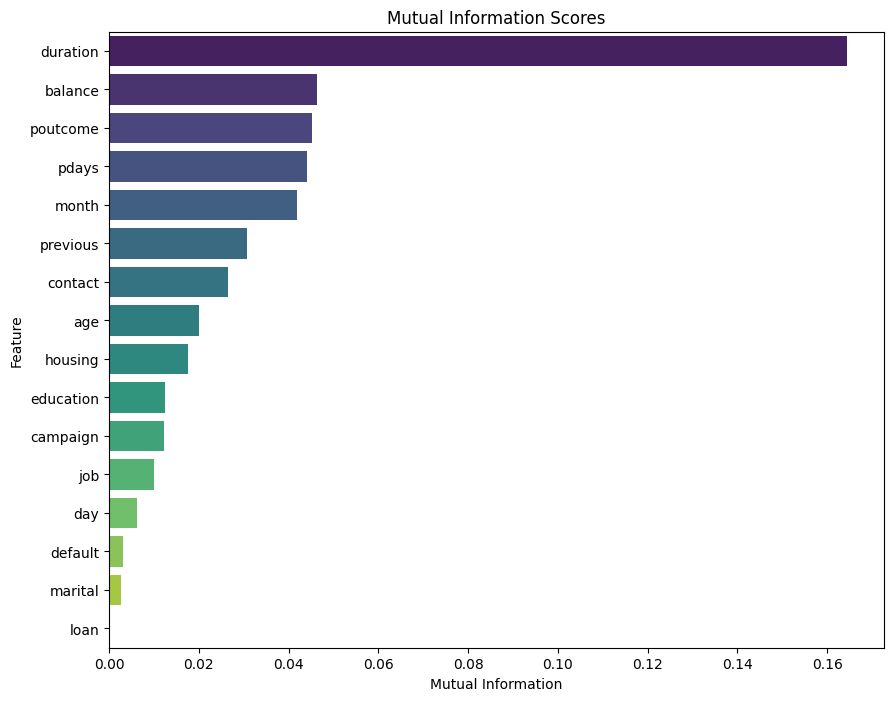

Top features based on mutual information: ['duration', 'balance', 'poutcome', 'pdays', 'month', 'previous', 'contact', 'age', 'housing', 'education']


In [111]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='viridis')
plt.title('Mutual Information Scores')
plt.show()

# Selecting top 10 features based on mutual information scores
top_mi_feat = mi_scores_df['Feature'].head(10).tolist()
print("Top features based on mutual information:", top_mi_feat)

###  SelectKBest.


In [112]:
# Select top 10 features
k = 10  
selector = SelectKBest(mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, Y)

# Get selected feature names
kbest_features = X.columns[selector.get_support()]
print("Selected Features:", kbest_features)

Selected Features: Index(['age', 'job', 'balance', 'housing', 'contact', 'month', 'duration',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


### Combining features selected from correlation analysis, mutual information, and SelectKBest

In [113]:


# Combine the filtered feature lists using union
combined_features = set(strong_corr_features).union(top_mi_feat).union(kbest_features)

# Print the combined significant features
print("Combined significant features:", combined_features)



Combined significant features: {'job', 'previous', 'loan', 'month', 'education', 'housing', 'deposit', 'poutcome', 'balance', 'contact', 'age', 'pdays', 'duration', 'campaign'}


### Selecting Final Features

In [114]:
# Creating a new DataFrame with the selected features
Features = bank_dataset[list(combined_features)]
X = Features.drop(columns='deposit')
Y = Features['deposit']

### Normalizing or scaling data

In [115]:
# Scaling the features using StandardScaler to standardize the dataset for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting Data

In [116]:
# Splitting the dataset into training and testing sets (20% test, 80% train)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Printing the shape of the training data to check the number of samples and features
print(X_train.shape)
print(Y_train.shape)

(8929, 13)
(8929,)


# **Training Models**

In [117]:
models = {
    'Logistic Regression': LogisticRegression(solver="saga",max_iter=5000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

###  Models Training

In [118]:
# Train each model
for model_name, model in models.items():
    model.fit(X_train, Y_train)  # Train the model
    print(f"{model_name} trained successfully.")

Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.


### 5-fold Cross Validation to evaluate model performance

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Perform 5-fold cross-validation for classification
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')  # Use scoring='accuracy' for classification
    print(f"{model_name} - Mean Accuracy: {scores.mean():.4f}")


Logistic Regression - Mean Accuracy: 0.7256
Decision Tree - Mean Accuracy: 0.7733
Random Forest - Mean Accuracy: 0.8422


# **Feature Importance and Impact**

In [120]:
# A RandomForest is trained
importances = models['Random Forest'].feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


      Feature  Importance
11   duration    0.389909
7     balance    0.107901
9         age    0.098735
3       month    0.092450
10      pdays    0.047109
8     contact    0.046259
0         job    0.046196
12   campaign    0.040389
6    poutcome    0.037939
5     housing    0.030128
4   education    0.026138
1    previous    0.025198
2        loan    0.011650


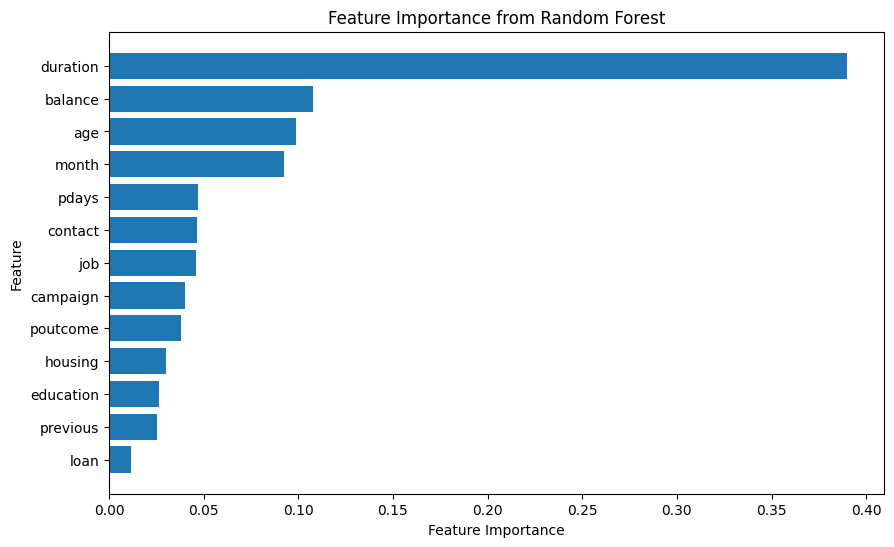

In [121]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To show the highest importance on top
plt.show()

In [122]:
#  Logistic Regression is trained
coefficients = models['Logistic Regression'].coef_[0]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance_df)


      Feature  Coefficient
11   duration     0.003116
10      pdays     0.002442
1    previous     0.000619
7     balance     0.000026
2        loan    -0.000302
4   education    -0.000684
5     housing    -0.000998
8     contact    -0.001364
6    poutcome    -0.002408
0         job    -0.002697
12   campaign    -0.003506
3       month    -0.004983
9         age    -0.026206


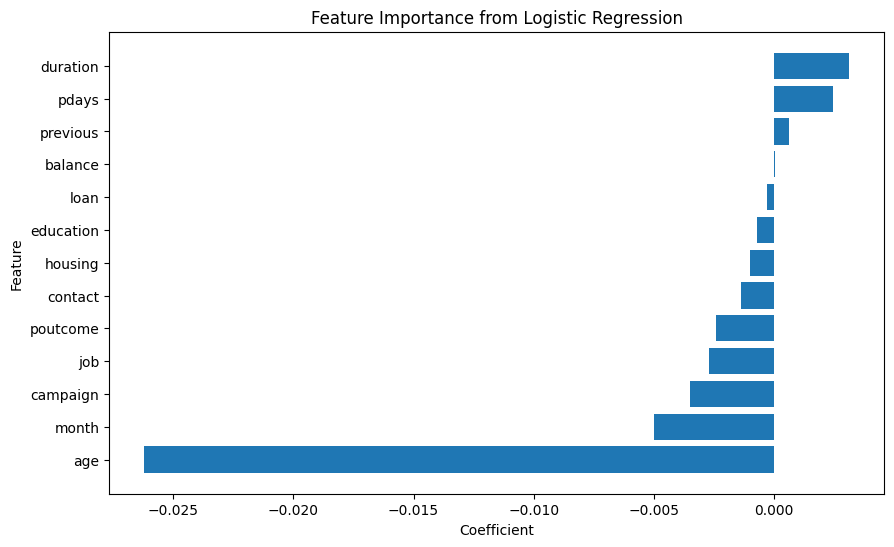

In [123]:
# Visualizing
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()
plt.show()


In [125]:
# Decision Tree model is trained
importances = models['Decision Tree'].feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


      Feature  Importance
11   duration    0.379960
3       month    0.101028
7     balance    0.097135
9         age    0.091056
10      pdays    0.077752
8     contact    0.070686
0         job    0.039948
5     housing    0.037647
12   campaign    0.034908
6    poutcome    0.032584
4   education    0.020260
1    previous    0.011326
2        loan    0.005709


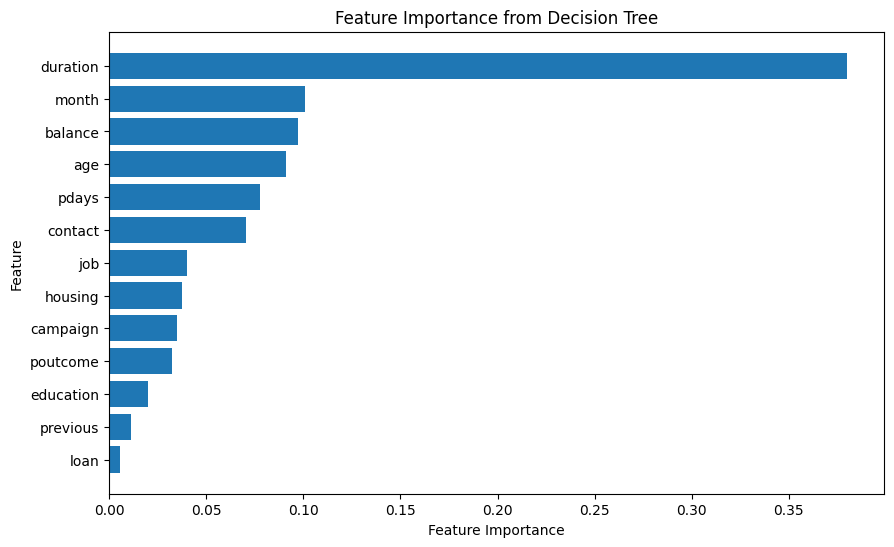

In [126]:

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()  # To show the highest importance on top
plt.show()


In [127]:
# Creating an empty list to store feature importance data for each model
model_importance_list = []

# Looping through each model to calculate and store feature importance
for model_name, model in models.items():

    # Calculating feature importance based on the model type
    if model_name == 'Logistic Regression':
        # Logistic Regression uses coefficients as feature importance
        importance_values = np.abs(model.coef_[0])  # Getting the absolute values of the coefficients   
    else:
        # Decision Tree & XGBoost use the 'feature_importances_' attribute for feature importance
        importance_values = model.feature_importances_
    
    feature_importance = pd.DataFrame({
    'Model': [model_name] * len(X_train.columns),
    'Feature': X_train.columns,
    'Importance': importance_values }).sort_values(by='Importance', ascending=False)

    # Appending each model's feature importance data to the list
    model_importance_list.append(feature_importance)

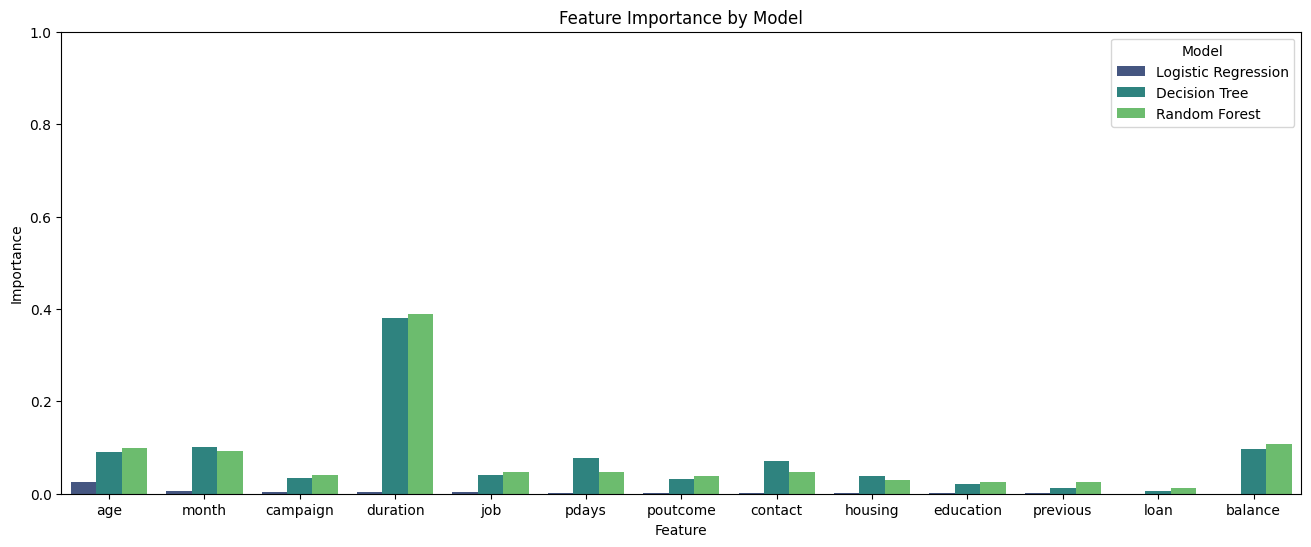

In [128]:
# Combining all feature importance data into a single DataFrame for comparison
final_importance_df = pd.concat(model_importance_list, axis=0, ignore_index=True)
# Plotting feature importance for each model
plt.figure(figsize=(16, 6))  # Setting figure size for the plot
sns.barplot(data=final_importance_df, x='Feature', y='Importance', hue='Model', palette='viridis')  # Creating a bar plot
plt.title('Feature Importance by Model')  # Setting plot title
plt.xlabel('Feature')  # Label for x-axis
plt.ylabel('Importance')  # Label for y-axis
plt.ylim(0, 1)  # Setting y-axis limits as feature importance values
plt.show()

# **Model Evaluation**

## Model Comparision

In [124]:


# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions on the test set
    Y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred, average='weighted')
    rec = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    
    # Append metrics to the results dictionary
    results['Model'].append(model_name)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1-Score'].append(f1)

# Convert the results to a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.707568   0.707535  0.707568   0.70755
1        Decision Tree  0.762651   0.762589  0.762651   0.76261
2        Random Forest  0.824451   0.825964  0.824451   0.82453


## **Document the feature importance ranking and provide a brief analysis of their impact.**

### **Logistic Regression:**
### Key Predictors:
Month and Age are among the most significant predictors for Logistic Regression, indicating their relevance in linear decision boundaries.
Poutcome and Contact contribute to the model's predictions but with lower importance.
## Moderate Impact:
Features like Balance and Housing play a moderate role, reflecting their partial relevance in explaining target outcomes.
### Low Impact:
Features such as Campaign, Loan, and Previous contribute minimally to the model's predictions, showing limited influence.
### **Decision Trees:**
### Top Features:
Duration is the standout feature, dominating the decision splits in the tree. This underscores the critical importance of interaction length in determining the target outcome.
Balance and Age follow as significant contributors, highlighting their influence in capturing customer financial stability and demographic relevance.
### Moderate Impact:
Month, Pdays, and Poutcome show moderate significance, suggesting seasonal trends and past interactions moderately influence decisions.
### Low Impact:
Features such as Education, Loan, and Housing contribute less to the tree's decision-making.
### **Random Forest:**
### Highly Significant Features:
Duration again emerges as the most influential feature, emphasizing the importance of interaction time in Random Forest's ensemble decision-making process.
Balance plays a substantial role, reinforcing the importance of financial indicators.
### Moderately Important Features:
Pdays, Month, and Poutcome have moderate influence, indicating the importance of timing and past interactions in campaign success.
### Low Impact:
Features like Education, Loan, and Previous are less impactful, suggesting they have a minimal role in the model's performance.


## **Conclusion**
### Cross-Model Insights:

Duration consistently emerges as the most important feature across Decision Tree and Random Forest models, underscoring its critical role in predicting outcomes.<br>
Balance, Age, and Month show varying levels of importance across models, reflecting their relevance in different model architectures.<br>
Poutcome and Contact are significant in Logistic Regression, emphasizing their role in linear relationships.
### Model-Specific Observations:

Decision Tree heavily relies on Duration and Balance, focusing on the interaction length and financial stability of customers.<br>
Logistic Regression assigns greater importance to Month and Age, capturing linear relationships with seasonal trends and demographics.
Random Forest balances feature contributions but highlights the dominance of Duration and Balance.
